In [1]:
from ragcar import Ragcar

In [2]:
Ragcar.available_models("sentence_embedding")

'Available models for sentence_embedding are ([src]: model_name_or_path, [model]: leewaay/kpf-bert-base-klueNLI-klueSTS-MSL512, leewaay/klue-roberta-base-klueNLI-klueSTS-MSL512, leewaay/klue-roberta-large-klueNLI-klueSTS-MSL512, MODELS_SUPPORTED(https://huggingface.co/models?pipeline_tag=sentence-similarity)), ([src]: googledrive, [model]: YOUR_MODEL), ([src]: openai, [model]: text-embedding-3-large, text-embedding-3-small, text-embedding-ada-002, MODELS_SUPPORTED(https://platform.openai.com/docs/models)), ([src]: clova, [model]: YOUR_MODEL(https://www.ncloud.com/product/aiService/clovaStudio))'

In [3]:
Ragcar.available_customizable_src("sentence_embedding")

"Available customizable src for sentence_embedding are ['clova', 'model_name_or_path', 'openai', 'googledrive']"

# Parameters for Prediction
* batch_size (int): Batch size for encoding multiple sentences
* convert_to_tensor (bool): Whether to convert the output to a PyTorch tensor

# Models

## [Hugging Face 🤗](https://huggingface.co/models?library=sentence-transformers)
모델은 기본적으로 ` ~/.cache/huggingface/hub` 경로에 저장됩니다.

In [4]:
se = Ragcar(tool="sentence_embedding", src="model_name_or_path")

In [5]:
se("'RAGCAR'는 'Retrieval-Augmented Generative Companion for Advanced Research'의 준말입니다.")

array([-6.58809364e-01,  4.63990748e-01,  3.90021466e-02, -7.07361341e-01,
       -1.84517097e+00, -4.38056797e-01,  3.11611056e-01,  5.25213480e-01,
        1.78212538e-01, -8.21301639e-01,  4.31561321e-01,  9.97587815e-02,
        4.46227610e-01,  5.40554881e-01, -1.93881333e-01,  1.41356029e-02,
        1.06956398e+00,  8.30625892e-02,  9.29874182e-01, -6.62793696e-01,
       -7.06055224e-01, -7.95130610e-01, -1.22563869e-01,  9.01221156e-01,
        3.74794334e-01,  2.72473007e-01,  7.12210357e-01,  7.03881741e-01,
       -4.61984694e-01, -2.15103582e-01, -1.15113579e-01, -4.15964484e-01,
       -1.23442568e-01,  1.15470827e+00, -1.01813936e+00, -4.86400008e-01,
       -1.28688455e+00,  5.35274208e-01,  5.93726039e-01, -1.76361680e+00,
        8.42809021e-01,  6.33966029e-01, -5.23950219e-01,  4.43766385e-01,
        1.24209809e+00, -1.83059645e+00, -1.74098265e+00, -2.25607622e-02,
       -1.32158446e+00,  1.77973986e-01,  3.83968681e-01,  2.93152452e-01,
        1.52455902e+00, -

In [6]:
vector = se(
    "'RAGCAR'는 'Retrieval-Augmented Generative Companion for Advanced Research'의 준말입니다.",
    convert_to_tensor=True
)

print(vector[:5])

tensor([-0.6588,  0.4640,  0.0390, -0.7074, -1.8452], device='cuda:0')


## Local

In [7]:
se = Ragcar(tool="sentence_embedding", src="model_name_or_path", model="./models/training_klue-stsbenchmark_continue-training_klue-roberta-large_2022-10-31_09-49-34")

In [8]:
se("'RAGCAR'는 'Retrieval-Augmented Generative Companion for Advanced Research'의 준말입니다.")[:5]

array([-0.00369105,  0.48646706, -0.18497321,  0.4955616 , -0.01973542],
      dtype=float32)

## 구글 드라이브
모델 폴더 자체를 `.zip` 형식으로 압축하고 구글 드라이브에 업로드 합니다. 모델은 `~/.cache/gdown/models` 경로에 저장됩니다.
* model_n: 모델 폴더명
* model_url: 구글 드라이브 공유 링크 내 ID (https://drive.google.com/file/d/{model_id}/view?usp=drive_link)

In [9]:
Ragcar.available_model_fields("googledrive")

'Available fields for googledrive are ([field]: model_n, [type]: str), ([field]: model_url, [type]: str)'

In [10]:
se = Ragcar(
    tool="sentence_embedding", 
    src="google", 
    model={
        "model_n": "training_klue-stsbenchmark_continue-training_klue-roberta-large_2022-10-31_09-49-34",
        "model_url": "https://drive.google.com/file/d/1F2P-GA9P9PYuUbK_tYotn68P8MbR0EBW/view?usp=drive_link"
    }
)

Downloading...
From (original): https://drive.google.com/uc?id=1F2P-GA9P9PYuUbK_tYotn68P8MbR0EBW
From (redirected): https://drive.usercontent.google.com/download?id=1F2P-GA9P9PYuUbK_tYotn68P8MbR0EBW&confirm=t&uuid=8fcda006-bfbe-4e1d-bc2f-fc55bc405271
To: /home/pcn/RnS/test/wslee/solution/toolva/RAGCAR/examples/training_klue-stsbenchmark_continue-training_klue-roberta-large_2022-10-31_09-49-34.zip
100%|██████████| 1.24G/1.24G [00:25<00:00, 48.7MB/s]


In [11]:
se("'RAGCAR'는 'Retrieval-Augmented Generative Companion for Advanced Research'의 준말입니다.")[:5]

array([-0.00369105,  0.48646706, -0.18497321,  0.4955616 , -0.01973542],
      dtype=float32)

## Generative AI

### [OpenAI 모델](https://platform.openai.com/docs/guides/embeddings/embedding-models)
`.env` 파일 또는 환경 변수로 `OPENAI_API_KEY`를 설정하거나 다음과 같이 직접 변수를 입력합니다.
* model_n: 모델명
* api_key: OPENAI_API_KEY

In [12]:
se = Ragcar(tool="sentence_embedding", src="openai")

In [13]:
se(
    "'RAGCAR'는 'Retrieval-Augmented Generative Companion for Advanced Research'의 준말입니다.",
    convert_to_tensor=True
)[:5]

tensor([-0.0255, -0.0245, -0.0317, -0.0036, -0.0259])

In [14]:
Ragcar.available_model_fields("openai")

'Available fields for openai are ([field]: model_n, [type]: str), ([field]: api_key, [type]: str)'

In [15]:
import os
from dotenv import load_dotenv

load_dotenv()

True

In [16]:
se = Ragcar(
    tool="sentence_embedding", 
    src="openai",
    model={
        "model_n": "text-embedding-3-large",
        "api_key": os.getenv('OPENAI_API_KEY')
    }
)

In [17]:
se("'RAGCAR'는 'Retrieval-Augmented Generative Companion for Advanced Research'의 준말입니다.")[:5]

[-0.02581464871764183,
 -0.024363741278648376,
 -0.032034870237112045,
 -0.0037745123263448477,
 -0.025987032800912857]

### HyperCLOVA 모델
`.env` 파일 또는 환경 변수로 `X-NCP-APIGW-API-KEY`, `X-NCP-CLOVASTUDIO-API-KEY`를 설정하거나 다음과 같이 직접 변수를 입력합니다. 
HyperCLOVA API 사용방법은 [여기서](https://guide.ncloud-docs.com/docs/clovastudio-explorer03) 참고해주세요.
* model_n: API URL
* api_key: X-NCP-APIGW-API-KEY
* app_key: X-NCP-CLOVASTUDIO-API-KEY

In [18]:
se = Ragcar(
    tool="sentence_embedding", 
    src="clova",
    model="https://clovastudio.apigw.ntruss.com/testapp/v1/api-tools/embedding/clir-emb-dolphin/{}".format(os.getenv('EMBEDDING_APP_ID'))
)

In [19]:
se("'RAGCAR'는 'Retrieval-Augmented Generative Companion for Advanced Research'의 준말입니다.")[:5]

[-0.58226234, -0.32943937, -0.7861445, 1.7102079, -1.2676771]

In [20]:
Ragcar.available_model_fields('clova')

'Available fields for clova are ([field]: model_n, [type]: str), ([field]: api_key, [type]: str), ([field]: app_key, [type]: str)'

In [21]:
se = Ragcar(
    tool="sentence_embedding", 
    src="clova",
    model={
        "model_n": "https://clovastudio.apigw.ntruss.com/testapp/v1/api-tools/embedding/clir-emb-dolphin/{}".format(os.getenv('EMBEDDING_APP_ID')),
        "api_key": os.getenv("X-NCP-APIGW-API-KEY"),
        "app_key": os.getenv("X-NCP-CLOVASTUDIO-API-KEY")
    }
)

In [22]:
se("'RAGCAR'는 'Retrieval-Augmented Generative Companion for Advanced Research'의 준말입니다.")[:5]

[-0.58226234, -0.32943937, -0.7861445, 1.7102079, -1.2676771]

### Sync VS Async

In [23]:
news_titles = [
    "프로농구 2023-2024시즌, 10월 21일 인삼공사 vs SK 경기로 개막", 
    "LG 최원태, 이적 후 첫 경기서 완벽투…우승 향한 '화룡점정'(종합)",
    "맨시티 홀란, AT 마드리드 친선경기 선발…그리에즈만과 맞대결",
    "이재성, 프리시즌 경기서 골맛…마인츠, 장크트갈렌에 4-1 승",
    "7월 건설경기실사지수 89.8…2년 7개월 만에 최고"
]

In [24]:
import time


# Output of Sync
print("\n-------------------------\n")
print("Sync")

embeder = Ragcar(
    tool="sentence_embedding", 
    src="openai",
    use_async=False
)

start = time.time()
result = embeder(news_titles)
end = time.time() - start
print(f"Total time: {end}")


embeder = Ragcar(
    tool="sentence_embedding", 
    src="openai",
    use_async=True
)

# Output of Async
print("\n-------------------------\n")
print("Async")
start = time.time()
result = await embeder(news_titles)
end = time.time() - start
print(f"Total time: {end}")


-------------------------

Sync
Total time: 2.526336669921875

-------------------------

Async
Total time: 1.590160846710205


## Embedder 성능 비교

### Embedding 속도 비교

In [25]:
sbert_base = Ragcar(
    tool="sentence_embedding", 
    src="model_name_or_path", 
    model="leewaay/kpf-bert-base-klueNLI-klueSTS-MSL512",
)

sbert_aug = Ragcar(
    tool="sentence_embedding", 
    src="model_name_or_path",
    model={
        "model_n": "leewaay/KPF-SBERT-klueNLI-klueSTS-augYNA-v1.0",
        "token": os.getenv("HUGGINGFACE_ACCESS_TOKENS")
    }
)

openai_ada = Ragcar(
    tool="sentence_embedding", 
    src="openai",
    model="text-embedding-ada-002"
)  # Rate Limit: 3000 / min

openai_small = Ragcar(
    tool="sentence_embedding", 
    src="openai",
    model="text-embedding-3-small"
)

openai_large = Ragcar(
    tool="sentence_embedding", 
    src="openai",
    model="text-embedding-3-large"
)

clova_sent = Ragcar(
    tool="sentence_embedding", 
    src="clova",
    model="https://clovastudio.apigw.ntruss.com/testapp/v1/api-tools/embedding/clir-sts-dolphin/{}".format(os.getenv('EMBEDDING_APP_ID'))
)

clova_doc = Ragcar(
    tool="sentence_embedding", 
    src="clova",
    model="https://clovastudio.apigw.ntruss.com/testapp/v1/api-tools/embedding/clir-emb-dolphin/{}".format(os.getenv('EMBEDDING_APP_ID'))
)

embedders = {
    "SBERT-KPF": sbert_base, 
    "SBERT-KPF-Aug": sbert_aug, 
    "OpenAI-ada-002": openai_ada,
    "OpenAI-3-small": openai_small,
    "OpenAI-3-large": openai_large,
    "HyperCLOVA X-Doc": clova_doc,
    "HyperCLOVA X-Sentence": clova_sent
}

In [26]:
from tqdm.notebook import tqdm
import time
import matplotlib.pyplot as plt

def generate_embeddings(sents, embedders):
    embedding_times = {}
    for name, embedder in tqdm(embedders.items(), desc="Embedding Models"):
        total_time = 0
        for sent in tqdm(sents, desc=f"Processing {name}"):
            start_time = time.time()
            try:
                embeddings = embedder([sent], batch_size=1)
            except Exception as e:
                print(f"Error for {name}: {e}")
                continue
            end_time = time.time()
            total_time += end_time - start_time
        average_time = total_time / len(sents) if sents else 0
        embedding_times[name] = average_time
    
    return embedding_times

def plot_embedding_times(embedding_times):
    plt.bar(embedding_times.keys(), embedding_times.values())
    plt.ylabel("Average Time (seconds)")
    plt.title("Average Embedding Time Comparison")
    plt.xticks(rotation=45)
    plt.show()

Embedding Models:   0%|          | 0/7 [00:00<?, ?it/s]

Processing SBERT-KPF:   0%|          | 0/20 [00:00<?, ?it/s]

Processing SBERT-KPF-Aug:   0%|          | 0/20 [00:00<?, ?it/s]

Processing OpenAI-ada-002:   0%|          | 0/20 [00:00<?, ?it/s]

Processing OpenAI-3-small:   0%|          | 0/20 [00:00<?, ?it/s]

Processing OpenAI-3-large:   0%|          | 0/20 [00:00<?, ?it/s]

Processing HyperCLOVA X-Doc:   0%|          | 0/20 [00:00<?, ?it/s]

Processing HyperCLOVA X-Sentence:   0%|          | 0/20 [00:00<?, ?it/s]

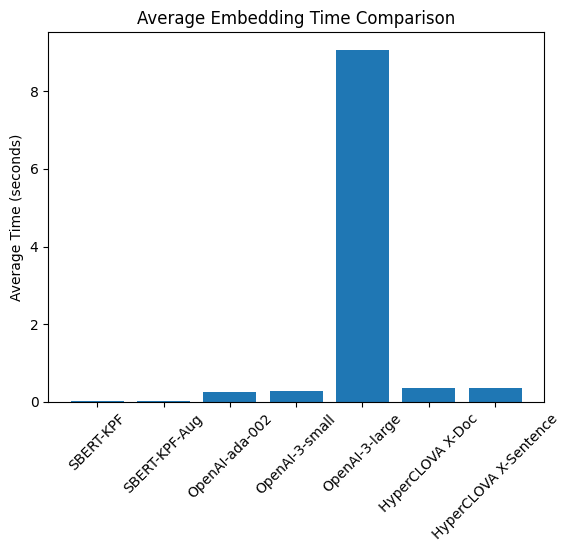

In [27]:
# Generate embeddings and measure embedding times
embedding_times = generate_embeddings(news_titles*4, embedders)

# Plot the embedding times
plot_embedding_times(embedding_times)

### STS 성능 비교

In [28]:
sbert_base = Ragcar(
    tool="sentence_embedding", 
    src="model_name_or_path", 
    model="leewaay/kpf-bert-base-klueNLI-klueSTS-MSL512",
)

sbert_aug = Ragcar(
    tool="sentence_embedding", 
    src="model_name_or_path",
    model={
        "model_n": "leewaay/KPF-SBERT-klueNLI-klueSTS-augYNA-v1.0",
        "token": os.getenv("HUGGINGFACE_ACCESS_TOKENS")
    }
)

openai_ada = Ragcar(
    tool="sentence_embedding", 
    src="openai",
    model="text-embedding-ada-002",
    use_async=True
)  # Rate Limit: 3000 / min

openai_small = Ragcar(
    tool="sentence_embedding", 
    src="openai",
    model="text-embedding-3-small",
    use_async=True
)

openai_large = Ragcar(
    tool="sentence_embedding", 
    src="openai",
    model="text-embedding-3-large",
    use_async=True
)

clova_sent = Ragcar(
    tool="sentence_embedding", 
    src="clova",
    model="https://clovastudio.apigw.ntruss.com/testapp/v1/api-tools/embedding/clir-sts-dolphin/{}".format(os.getenv('EMBEDDING_APP_ID')),
    use_async=True
)

clova_doc = Ragcar(
    tool="sentence_embedding", 
    src="clova",
    model="https://clovastudio.apigw.ntruss.com/testapp/v1/api-tools/embedding/clir-emb-dolphin/{}".format(os.getenv('EMBEDDING_APP_ID')),
    use_async=True
)

embedders = {
    "SBERT-KPF": sbert_base, 
    "SBERT-KPF-Aug": sbert_aug, 
    "OpenAI-ada-002": openai_ada,
    "OpenAI-3-small": openai_small,
    "OpenAI-3-large": openai_large,
    "HyperCLOVA X-Doc": clova_doc,
    "HyperCLOVA X-Sentence": clova_sent
}

#### 01. Test Data
* 한국관광공사_무장애 여행 정보_GW(https://www.data.go.kr/data/15101897/openapi.do)

In [29]:
import pandas as pd


data = pd.read_csv("corpus_sample.csv")
data

,contentid,title,corpus
0,1433504,가경 터미널시장,"가경 터미널시장, 충북 청주시 흥덕구 가경동에 위치한 상설 재래시장이다. 논밭이었던..."
1,126273,가계해변,"가계해변, 바닷물이 갈라지는 현대판 모세의 기적으로 유명한 회동국민관광지 내에 있는..."
2,129854,가나아트센터,"가나아트센터, 1983년에 개관한 가나아트갤러리는 국내외 3백여 회의 기획전시 및 ..."
3,129194,가나아트파크,"가나아트파크, 가나아트파크(전, 장흥아트파크)는 1984년 국내 최초 사립미술관인 ..."
4,2777865,가남체육공원,"가남체육공원, 가남체육공원은 가남면 태평리에 위치한 주민들을 위한 다목적 체육활동 ..."
...,...,...,...
5280,1839801,[제주올레 14코스] 저지-한림 올레,"[제주올레 14코스] 저지-한림 올레, 고요하고 아늑한 초록의 숲길 올레와 시원하게..."
5281,1839536,[제주올레 4코스] 표선-남원 올레,"[제주올레 4코스] 표선-남원 올레, 눈부신 백사장에서 시작되는 아름다운 해안 올레..."
5282,1839552,[제주올레 5코스] 남원-쇠소깍 올레,"[제주올레 5코스] 남원-쇠소깍 올레, 오감을 활짝 열고 걷는 바당올레와 마을 올레..."
5283,1839621,[제주올레 6코스] 쇠소깍-제주올레 여행자센터 올레,"[제주올레 6코스] 쇠소깍-제주올레 여행자센터 올레, 쇠소깍 다리를 출발하여 서귀포..."


In [30]:
 # HyperCLOVA X 임베딩 최대 500토큰 & '서울'과 '부산' 지역 대상만 필터
data['corpus_length'] = data['corpus'].apply(len)
filtered_data = data[(data['corpus'].apply(len) < 500/2) & (data['corpus'].str.contains('서울|부산'))]
filtered_data.reset_index(inplace=True)
filtered_data

,index,contentid,title,corpus,corpus_length
0,28,849929,가야할매밀면전문점,"가야할매밀면전문점, ※ 영업시간 11:00 ~ 19:30\n\n가야할매밀면전문점은 ...",189
1,93,131139,강남청소년수련관,"강남청소년수련관, 청담근린공원 인근에 위치한 강남청소년수련관은 서울YWCA에서 운영...",82
2,96,130376,강동문화원,"강동문화원, 강동문화원은 지방문화원 진흥법에 의거, 1999년 1월 29일 서울특별...",188
3,219,1832011,갤럭시호텔,"갤럭시호텔, 인천의 명소 계산동에 있는 갤럭시호텔은 계양구청을 비롯하여 각종 쇼핑 ...",213
4,291,2930839,경리단길,"경리단길, 경리단길은 국군재정관리단 정문으로부터 그랜드하얏트 호텔 방향으로 이어지는...",237
...,...,...,...,...,...
166,5213,143154,B-STAY 부천호텔,"B-STAY 부천호텔, 문화 융성 행사와 비즈니스가 활발한 부천 상동에 위치하고 있...",224
167,5237,2773265,K현대미술관,"K현대미술관, 서울 강남구 압구정동 중심에 위치한 K현대미술관은 6개 층 전시장 4...",225
168,5243,136323,Nu Motel(엔유모텔),"Nu Motel(엔유모텔), 서울 송파구 잠실에 위치한 Nu Motel은 다양한 타...",56
169,5253,2679078,YG리퍼블릭 센트럴시티,"YG리퍼블릭 센트럴시티, 화사한 분위기의 브런치 전문카페다. 대표메뉴는 라자냐다. ...",64


#### 02. Embedding

In [31]:
from tqdm.notebook import tqdm
import pandas as pd
import torch
import os
import pickle


def save_to_pkl(data, filename):
    with open(filename, "wb") as file:
        pickle.dump(data, file)

async def generate_embeddings(data, embedders):
    df = data.copy()
    
    texts = df['corpus'].to_list()
    
    if os.path.exists("embeddings.pkl"):
        df = pd.read_pickle("embeddings.pkl")

    for name, embedder in tqdm(embedders.items(), desc="Embedding Models"):
        if name in df.columns:
            continue
        
        try:
            if embedder.src in ["clova", "openai"]:
                embeddings = await embedder(texts, batch_size=len(texts))
            else:
                embeddings = embedder(texts, batch_size=len(texts))
        except Exception as e:
            print(f"Error for {name}: {e}")
            df[name] = [None] * len(df)
        
        if type(embeddings) == torch.Tensor:
            embeddings = embeddings.cpu().numpy()
        
        df[name] = list(embeddings)
        
        save_to_pkl(df, "embeddings.pkl")
    
    return df

In [32]:
# Generate embeddings
await generate_embeddings(filtered_data, embedders)

Embedding Models:   0%|          | 0/7 [00:00<?, ?it/s]

,level_0,index,contentid,title,corpus,corpus_length,SBERT-KPF,SBERT-KPF-Aug,OpenAI-ada-002,OpenAI-3-small,OpenAI-3-large,HyperCLOVA X-Doc,HyperCLOVA X-Sentence
0,28,28,849929,가야할매밀면전문점,"가야할매밀면전문점, ※ 영업시간 11:00 ~ 19:30\n\n가야할매밀면전문점은 ...",189,"[1.0257232, 0.4795569, -0.24692473, 0.6120842,...","[0.27354264, -0.4900314, -0.18260068, -0.47131...","[-0.0027840151451528072, -0.0172270555049181, ...","[0.02169356867671013, 0.013716896064579487, 0....","[-0.016049101948738098, -0.004607531242072582,...","[-0.2592474, -0.675503, -0.8229767, 1.5691866,...","[-0.07765081, 0.8783126, 0.5896064, -0.0832549..."
1,93,93,131139,강남청소년수련관,"강남청소년수련관, 청담근린공원 인근에 위치한 강남청소년수련관은 서울YWCA에서 운영...",82,"[-0.6170159, 0.83270067, 0.16490817, 1.0034912...","[-0.12936194, 0.3374649, -0.5095007, -0.547397...","[0.0031752458307892084, -0.01563984341919422, ...","[-0.03798767551779747, 0.04685576260089874, 0....","[0.005944740027189255, 0.019555499777197838, -...","[-0.58942395, -0.65845746, -0.4363828, 1.79047...","[-1.0795499, 0.5028424, 1.3751334, 0.40876696,..."
2,96,96,130376,강동문화원,"강동문화원, 강동문화원은 지방문화원 진흥법에 의거, 1999년 1월 29일 서울특별...",188,"[0.035636947, 0.2282561, 0.5335356, -0.6749102...","[-0.23202783, -1.4914424, 0.2463897, -1.823587...","[-0.008412346243858337, -0.0096537284553051, 0...","[-0.006765034515410662, 0.013839703053236008, ...","[0.011444931849837303, -0.007484344765543938, ...","[-0.46352774, -0.381572, -0.67592627, 1.729349...","[0.05757965, 0.6126798, 1.5715954, -0.09687182..."
3,219,219,1832011,갤럭시호텔,"갤럭시호텔, 인천의 명소 계산동에 있는 갤럭시호텔은 계양구청을 비롯하여 각종 쇼핑 ...",213,"[-0.032516427, 1.5167137, -0.71540624, 0.00063...","[-0.5593504, -0.19543725, -0.84314096, -0.0850...","[0.004422867204993963, -0.00715367728844285, 0...","[-0.03396568074822426, -0.0008228163933381438,...","[-0.023853745311498642, 0.010331676341593266, ...","[-0.46343702, -0.38022414, -0.68982786, 1.6462...","[-0.13232134, 1.0745345, -0.3651096, 0.9655325..."
4,291,291,2930839,경리단길,"경리단길, 경리단길은 국군재정관리단 정문으로부터 그랜드하얏트 호텔 방향으로 이어지는...",237,"[-0.62743396, 0.14826475, -0.30096906, 0.90702...","[-0.6782362, -0.45191792, 0.07866122, 0.135711...","[0.0011949377367272973, 0.006019672378897667, ...","[-0.004717695526778698, -0.007593647576868534,...","[0.023708278313279152, -0.012838417664170265, ...","[-0.07597573, -0.37387004, -0.8092126, 1.57855...","[0.12920193, 1.4433882, -0.92319846, 0.8119752..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,5213,5213,143154,B-STAY 부천호텔,"B-STAY 부천호텔, 문화 융성 행사와 비즈니스가 활발한 부천 상동에 위치하고 있...",224,"[1.1657466, 0.47436696, -0.72118044, 0.9141416...","[0.511497, 0.28135815, -1.622722, 0.33820242, ...","[-0.010168266482651234, -0.00559287890791893, ...","[-0.04657468944787979, -0.007063354831188917, ...","[0.005402994807809591, 0.01052427850663662, -0...","[-0.73108125, -0.6263393, -0.668604, 1.6548625...","[-0.6200495, -0.76538575, 0.9391821, 1.546206,..."
167,5237,5237,2773265,K현대미술관,"K현대미술관, 서울 강남구 압구정동 중심에 위치한 K현대미술관은 6개 층 전시장 4...",225,"[-0.07897927, -0.2609432, -0.31473598, 1.29413...","[-0.3612953, -0.42055097, -0.0049805488, -0.24...","[-0.012639603577554226, 0.016648905351758003, ...","[-0.03859039023518562, -0.01807604543864727, 0...","[-0.0029545510187745094, -0.009668600745499134...","[-0.21361667, -0.40932435, -0.61457944, 1.6697...","[0.967454, 2.0255396, 0.22378139, 0.66910124, ..."
168,5243,5243,136323,Nu Motel(엔유모텔),"Nu Motel(엔유모텔), 서울 송파구 잠실에 위치한 Nu Motel은 다양한 타...",56,"[-0.6214877, 1.0257956, -0.44327292, 0.9214335...","[-1.1674879, -0.026108414, -0.46229532, 0.8975...","[0.006989470683038235, -0.013132115826010704, ...","[-0.03985128179192543, -0.0015552920522168279,...","[0.020730692893266678, 0.001353973289951682, -...","[-0.47306365, -0.86645055, -0.5186215, 1.43403...","[-1.5554496, -0.30004835, 1.3177197, -0.011845..."
169,5253,5253,2679078,YG리퍼블릭 센트럴시티,"YG리퍼블릭 센트럴시티, 화사한 분위기의 브런치 전문카페다. 대표메뉴는 라자냐다. ...",64,"[-0.17203073, 1.7514752, 0.56470835, -0.404191...","[-0.10437983, 0.8529602, 0.9239901, -0.5624078...","[-0.004996097646

#### 03. STS

In [33]:
# 검색기 객체 생성
retrievers = {}
for key, value in embedders.items():
    retrievers[key] = Ragcar(tool="semantic_search", src=value.src, model=value.model_info)

In [34]:
import torch
import logging
import re
from IPython.display import display, HTML


logging.basicConfig(level=logging.WARN)

def highlight_keywords(text, keywords, color="yellow"):
    for keyword in keywords:
        # 정규 표현식을 사용하여 대소문자 구분 없이 키워드를 찾아 하이라이트
        text = re.sub(f"({keyword})", f"<span style='background-color: {color};'>\\1</span>", text, flags=re.IGNORECASE)
    return text

def get_relevant_datas(
    retrievers,
    embeddings, 
    query: str, 
    top_k: int = 5,
    min_score: float = 0.,
    keywords=[]
):
    for name, retriever in retrievers.items():
        print("\n-------------------------\n")
        print(f"Top-5 {name} Retrieval hits")
        
        hits = retriever(query, torch.tensor(embeddings[name].tolist()), top_k=top_k, min_score=min_score)[0]
        
        for hit in hits:
            item_at_index = embeddings.iloc[hit['corpus_id']]
            contentid_at_index = item_at_index['contentid']
            corpus_at_index = item_at_index['corpus']
            
            # 키워드 하이라이트 적용
            highlighted_corpus = highlight_keywords(corpus_at_index, keywords)
            
            # HTML로 변환하여 출력
            display(HTML(f"({hit['score']}) ID: {contentid_at_index}, <br>{highlighted_corpus}<br>"))

In [35]:
with open('embeddings.pkl', 'rb') as f:
    embeddings = pickle.load(f)

In [36]:
query = "식도락 여행 테마로 일정 계획해줘"
keywords = ['식도락', '음식', '식당', '전문점', '시장', '요리', '카페']
get_relevant_datas(retrievers, embeddings, query, keywords=keywords)


-------------------------

Top-5 SBERT-KPF Retrieval hits


/tmp/ipykernel_25493/3034381972.py:27: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  hits = retriever(query, torch.tensor(embeddings[name].tolist()), top_k=top_k, min_score=min_score)[0]



-------------------------

Top-5 SBERT-KPF-Aug Retrieval hits



-------------------------

Top-5 OpenAI-ada-002 Retrieval hits



-------------------------

Top-5 OpenAI-3-small Retrieval hits



-------------------------

Top-5 OpenAI-3-large Retrieval hits



-------------------------

Top-5 HyperCLOVA X-Doc Retrieval hits



-------------------------

Top-5 HyperCLOVA X-Sentence Retrieval hits
